In [ ]:
import csv
import math
from collections import defaultdict, Counter

DATA_FILE = "2024_tw_posts_president_scored_anon.csv"

def mean(numbers):
    return sum(numbers) / len(numbers) if numbers else 0

def std_dev(numbers):
    avg = mean(numbers)
    variance = sum((x - avg) ** 2 for x in numbers) / len(numbers) if numbers else 0
    return math.sqrt(variance)

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def read_csv(file_path):
    with open(file_path, mode="r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        return list(reader)

def generate_stats(data):
    columns = data[0].keys()
    stats = {}

    for col in columns:
        values = [row[col].strip() for row in data if row[col].strip() != '']
        numeric_values = [float(v) for v in values if is_number(v)]

        if numeric_values:
            stats[col] = {
                "count": len(numeric_values),
                "mean": round(mean(numeric_values), 2),
                "min": min(numeric_values),
                "max": max(numeric_values),
                "std_dev": round(std_dev(numeric_values), 2)
            }
        else:
            counter = Counter(values)
            stats[col] = {
                "count": len(values),
                "unique_count": len(set(values)),
                "most_frequent": counter.most_common(1)[0] if counter else None
            }

    return stats

def group_by(data, group_cols):
    grouped = defaultdict(list)
    for row in data:
        key = tuple(row[col] for col in group_cols)
        grouped[key].append(row)
    return grouped

def write_stats_to_csv(stats_dict, output_file, group_label=None):
    with open(output_file, mode='a', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        for col, stats in stats_dict.items():
            for stat_key, value in stats.items():
                writer.writerow([group_label or "overall", col, stat_key, value])


if __name__ == "__main__":
    # Clear previous output files
    open("summary_tw_posts_overall.csv", 'w').close()
    open("summary_tw_posts_grouped_id.csv", 'w').close()
    open("summary_tw_posts_grouped_id_quoteId.csv", 'w').close()

    data = read_csv(DATA_FILE)

    # Overall stats
    overall_stats = generate_stats(data)
    write_stats_to_csv(overall_stats, "summary_tw_posts_overall.csv")

    # Grouped by id
    id_groups = group_by(data, ["id"])
    for group_key in list(id_groups.keys())[:10]:  # Top 10
        stats = generate_stats(id_groups[group_key])
        group_label = f"id={group_key[0]}"
        write_stats_to_csv(stats, "summary_tw_posts_grouped_id.csv", group_label)

    # Grouped by id and quoteId
    id_quote_groups = group_by(data, ["id", "quoteId"])
    for group_key in list(id_quote_groups.keys())[:10]:  # Top 10
        stats = generate_stats(id_quote_groups[group_key])
        group_label = f"id={group_key[0]} | quoteId={group_key[1]}"
        write_stats_to_csv(stats, "summary_tw_posts_grouped_id_quoteId.csv", group_label)


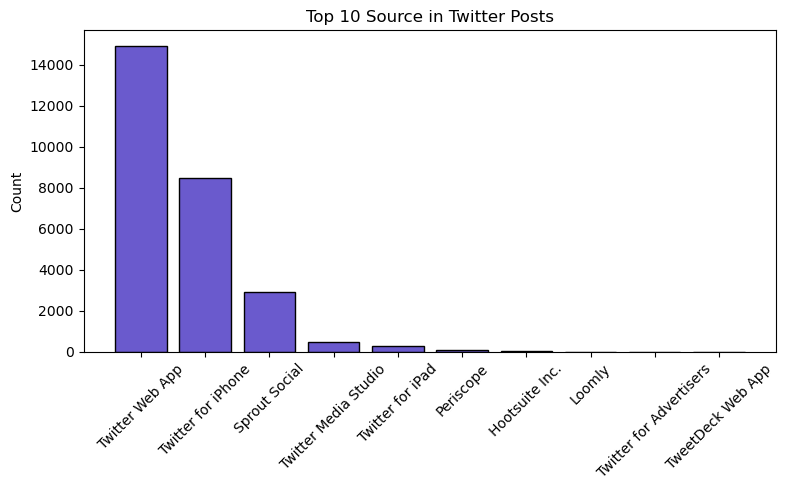

In [ ]:
import csv
import matplotlib.pyplot as plt
from collections import Counter

# Load data
file_path = "2024_tw_posts_president_scored_anon.csv"
column_name = "source"  

# Extract values from the specified column
values = []
with open(file_path, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        val = row.get(column_name, "").strip()
        if val:
            values.append(val)

# Count and sort top 10
value_counts = Counter(values)
top_values = value_counts.most_common(10)
labels, counts = zip(*top_values)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color="slateblue", edgecolor="black")
plt.title(f"Top 10 {column_name.capitalize()} in Twitter Posts")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("tw_posts_bar_source.png")
plt.show()